В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
import opendatasets as od
%matplotlib inline

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')
from process_bank_churn import preprocess_data, preprocess_new_data

In [3]:
# load dataset from Kaggle
dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu/data'
od.download(dataset_url)
data_dir = './bank-customer-churn-prediction-dlu/'
os.listdir(data_dir)
raw_df_url = '{}train.csv'.format(data_dir)
print(raw_df_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: oksanarolduhina
Your Kaggle Key: ··········


100%|██████████| 637k/637k [00:00<00:00, 77.7MB/s]


Extracting archive ./bank-customer-churn-prediction-dlu/bank-customer-churn-prediction-dlu.zip to ./bank-customer-churn-prediction-dlu
./bank-customer-churn-prediction-dlu/train.csv


In [4]:
# preprocess raw data
scaler_numeric = False
delete_cols = ['id', 'CustomerId', 'Surname']
raw_df=pd.read_csv(raw_df_url, index_col = 0)
data, scaler, encoder, input_cols = preprocess_data(raw_df,scaler_numeric, delete_cols)

In [5]:
# preprocess new data
new_df = raw_df.loc[:10]
new_data = preprocess_new_data(new_df, scaler, encoder, scaler_numeric, delete_cols)
new_data['new_X']

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
id,,,,,,,,,,,,,
0,678.0,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,1.0,0.0,0.0,0.0,1.0
1,687.0,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,1.0,0.0,0.0,1.0,0.0
2,682.0,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0,0.0,0.0,1.0,0.0
3,753.0,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0,1.0,0.0,0.0,1.0
4,544.0,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,0.0,1.0,0.0,1.0,0.0
5,602.0,33.0,1.0,120599.38,1.0,0.0,1.0,72950.14,0.0,0.0,1.0,0.0,1.0
6,739.0,36.0,1.0,0.00,1.0,1.0,1.0,134626.30,1.0,0.0,0.0,1.0,0.0
7,763.0,28.0,2.0,0.00,2.0,1.0,0.0,19283.14,0.0,0.0,1.0,0.0,1.0
8,620.0,56.0,4.0,113743.37,1.0,1.0,0.0,121440.80,0.0,1.0,0.0,1.0,0.0


**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [6]:
# import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.tree import plot_tree, export_text

In [7]:
# predict auroc function
def predict_auroc(model, X,y):

  pred_proba = model.predict_proba(X)[:,1]
  tpr, fpr, threshold = roc_curve(y, pred_proba, pos_label = 1)
  roc_auc = auc(tpr, fpr)
  return pred_proba, roc_auc

In [8]:
# train the model with default parameters
model = DecisionTreeClassifier(random_state = 42)
model.fit(data['train_X'],data['train_y'])

DecisionTreeClassifier(random_state=42)

In [9]:
print(f'Глибина дерева складає {model.tree_.max_depth}.')

Глибина дерева складає 25.


In [10]:
# predict on train and validation sets
pred_proba_train, roc_auc_train = predict_auroc(model, data['train_X'], data['train_y'])
pred_proba_val, roc_auc_val = predict_auroc(model, data['val_X'], data['val_y'])
print(f'ROC AUC на тренувальній вибірці: {roc_auc_train}')
print(f'ROC AUC на валідаційній вибірці: {roc_auc_val}')

ROC AUC на тренувальній вибірці: 1.0
ROC AUC на валідаційній вибірці: 0.7777659647438097


У моделі спостерігається сильне перенавчання. Про це свідчить:

1. AUC на тренувальній вибірці дорівнює 1, що свідчить, що модель дуже сильно підлаштувалася під тренувальні дані.
1. AUC на валідаційній вибірці суттєво нижче, ніж на тренувальній.

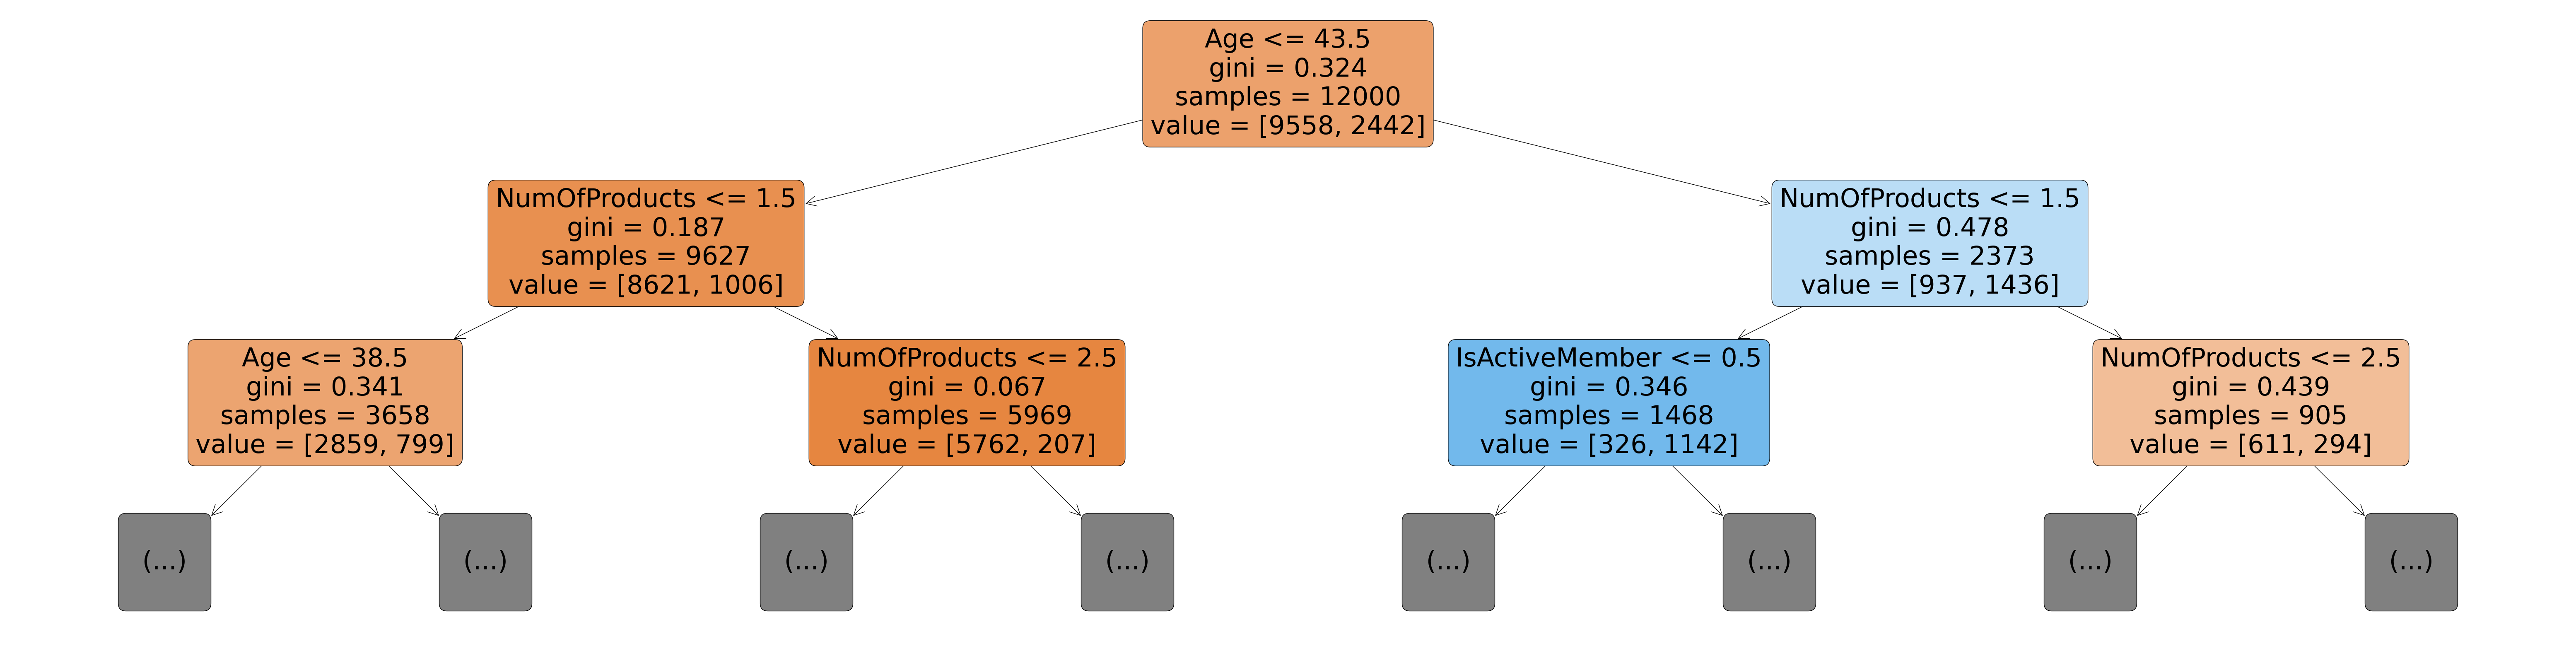

In [11]:
# build the tree structure
plt.figure(figsize = (80,20))
plot_tree(model, max_depth = 2, feature_names = data['train_X'].columns, filled = True, rounded = True);

In [12]:
# find most important features
df_importances = pd.DataFrame({'features':data['train_X'].columns, 'importances':model.feature_importances_})
df_importances.sort_values(by = 'importances', ascending = False, inplace = True)
df_importances.style.background_gradient(subset = 'importances', cmap = 'Blues')

,features,importances
1,Age,0.347081
4,NumOfProducts,0.166648
7,EstimatedSalary,0.142090
0,CreditScore,0.109021
3,Balance,0.085711
2,Tenure,0.050000
6,IsActiveMember,0.037713
9,Geography_Germany,0.015952
5,HasCrCard,0.012909
12,Gender_Male,0.009080


**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [13]:
def fit_predict_auc(data, max_leaf_nodes, max_depth):
  model = DecisionTreeClassifier(max_leaf_nodes = max_leaf_nodes, max_depth = max_depth, random_state = 42)
  model.fit(data['train_X'],data['train_y'])
  pred_proba_train, roc_auc_train = predict_auroc(model, data['train_X'], data['train_y'])
  pred_proba_val, roc_auc_val = predict_auroc(model, data['val_X'], data['val_y'])
  return {
      'model': model,
      'pred_proba_train': pred_proba_train,
      'roc_auc_train': roc_auc_train,
      'pred_proba_val': pred_proba_val,
      'roc_auc_val': roc_auc_val
      }

In [14]:
result = fit_predict_auc(data, 60, 6)
result

{'model': DecisionTreeClassifier(max_depth=6, max_leaf_nodes=60, random_state=42),
 'pred_proba_train': array([0.04448743, 0.1372549 , 0.0395189 , ..., 0.07602339, 0.0395189 ,
        0.00480769]),
 'roc_auc_train': 0.9335030759230382,
 'pred_proba_val': array([0.00480769, 0.01683938, 0.172     , ..., 0.06271777, 0.23033708,
        0.00480769]),
 'roc_auc_val': 0.9242839015021606}

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [15]:
from operator import itemgetter

# predict on different max_depth values
keys = ['roc_auc_train', 'roc_auc_val']
result_df = pd.DataFrame([itemgetter(*keys)(fit_predict_auc(data, max_depth=depth, max_leaf_nodes=10000)) for depth in range(1, 21,1)], columns = keys)
result_df['max_depth'] = result_df.index+1
result_df



,roc_auc_train,roc_auc_val,max_depth
0,0.745005,0.733747,1
1,0.843844,0.843126,2
2,0.898620,0.893736,3
3,0.911807,0.907608,4
4,0.924593,0.922418,5
5,0.933503,0.924284,6
6,0.940658,0.914438,7
7,0.949063,0.899985,8
8,0.959556,0.876549,9
9,0.969128,0.872364,10


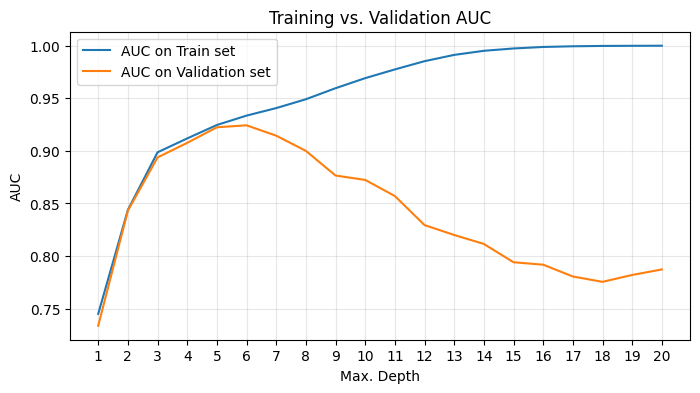

In [16]:
# plot AUC and max_depth dependency
plt.figure(figsize = (8,4))
plt.plot(result_df['max_depth'], result_df['roc_auc_train'], label = 'AUC on Train set')
plt.plot(result_df['max_depth'], result_df['roc_auc_val'], label = 'AUC on Validation set')
plt.xticks(range(1,21,1))
plt.title('Training vs. Validation AUC')
plt.xlabel('Max. Depth')
plt.ylabel('AUC')
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

Найкраще значення max_depth дорівнює 6. При цьому значенні AUC на валідаційному наборі досягає свого максимуму. Після нього AUC на тестовому продовжує рости, а на валідаційному - знижується (тобто відбувається перенавчання).

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [17]:
# fit the model with optimal max_depth value
model = DecisionTreeClassifier(max_depth = 6, random_state = 42)
model.fit(data['train_X'],data['train_y'])


DecisionTreeClassifier(max_depth=6, random_state=42)

In [18]:
test_raw_df = pd.read_csv('{}/test.csv'.format(data_dir))
test_raw_df['Exited'] = -1
test_data = preprocess_new_data(test_raw_df, scaler, encoder, scaler_numeric, delete_cols)

In [19]:
test_raw_df['Exited'] = model.predict_proba(test_data['new_X'])[:,1]
submission_df = test_raw_df[['id','Exited']].copy()
submission_df.to_csv('submission.csv', index = False)